In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.shape

(303, 14)

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

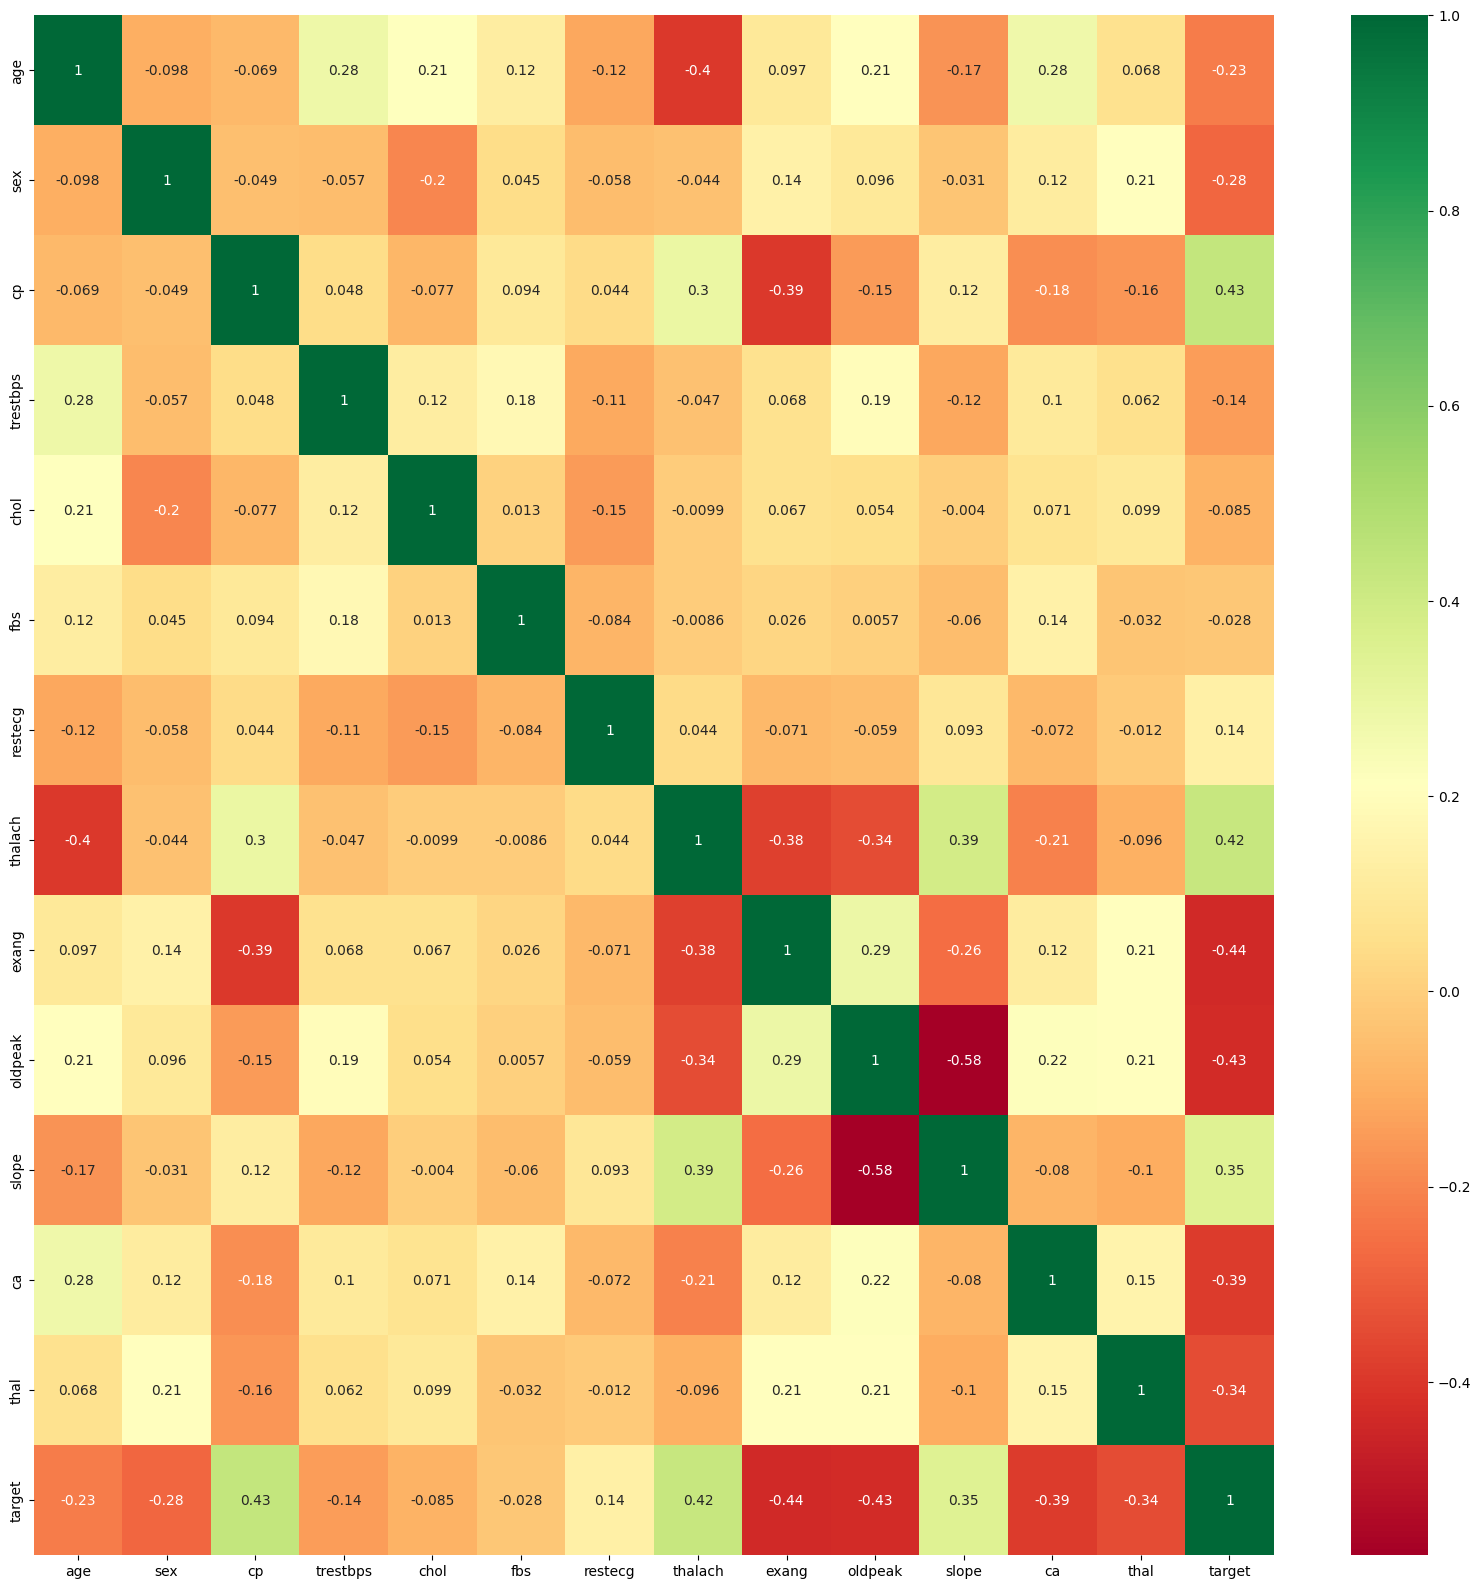

In [8]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

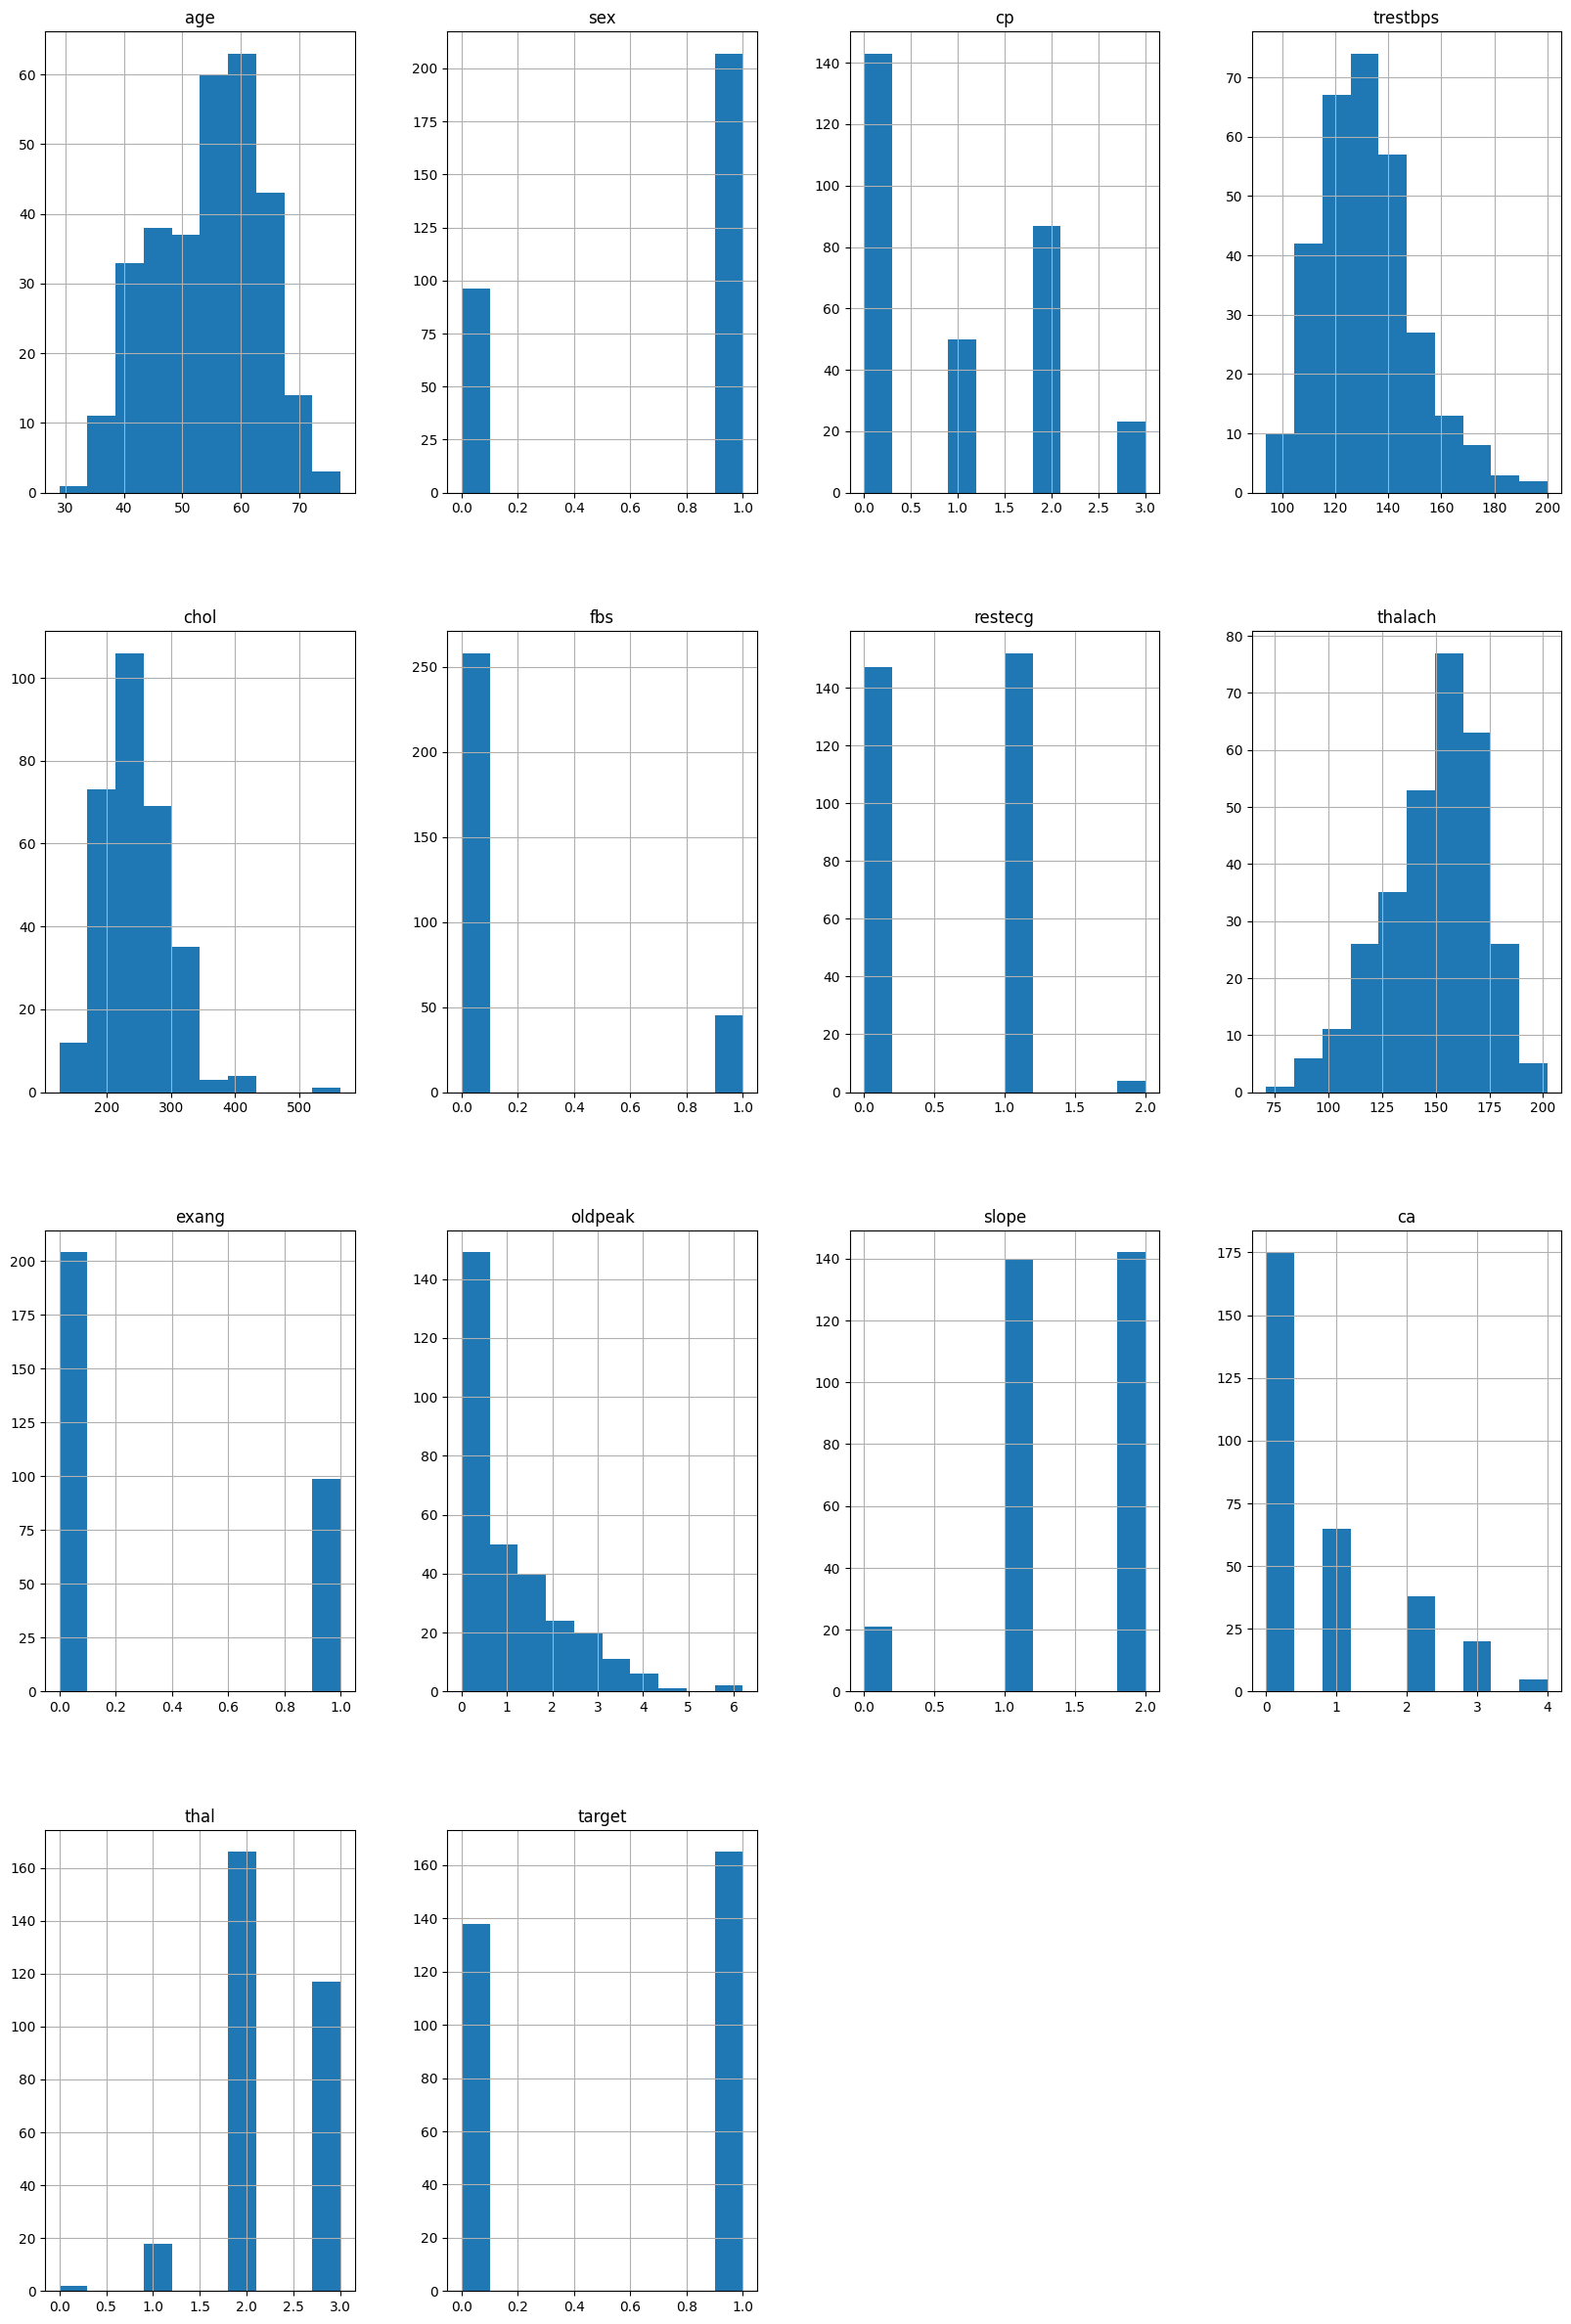

In [9]:
df.hist(figsize=(20,30))

In [10]:
x = df.iloc[:,:-1]
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [11]:
y = df.iloc[:,-1]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.25, random_state=0)

In [13]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(75, 13)
(228, 13)
(75,)
(228,)


In [14]:
def algo_model(x_train, x_test, y_train, y_test, model):
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    print('Prediction')
    print(pred)
    print("Training score: ",model.score(x_train, y_train))
    print("Testing Score: ", model.score(x_test, y_test))
    print('Confusion Matrix')
    print(confusion_matrix(y_test,pred))
    print('Classification Report')
    print(classification_report(y_test, pred))

## KNN

In [15]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,x,y,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

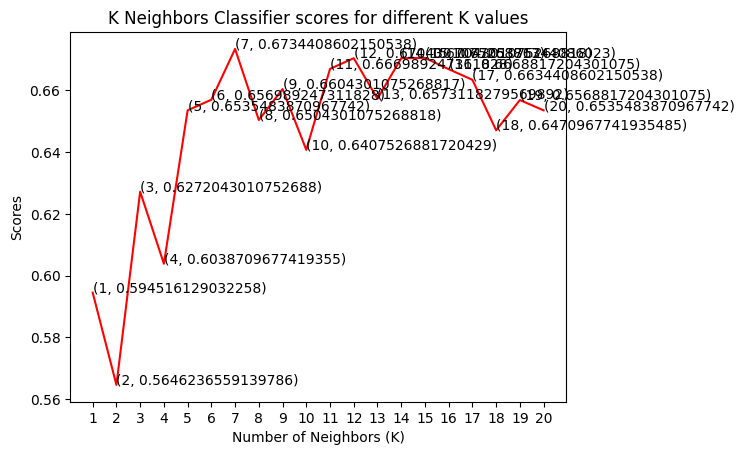

In [16]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [17]:
knn_classifier = KNeighborsClassifier(n_neighbors = 7)

In [18]:
algo_model(x_train, x_test, y_train, y_test, knn_classifier)

Prediction
[0 0 1 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 0
 0 0 1 1 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1
 0 0 1 1 1 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1 0 0
 1 1 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 1 1
 0 1 1 1 1 0 0 0 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 1
 0 1 0 1 1 0]
Training score:  0.6933333333333334
Testing Score:  0.6271929824561403
Confusion Matrix
[[69 34]
 [51 74]]
Classification Report
              precision    recall  f1-score   support

           0       0.57      0.67      0.62       103
           1       0.69      0.59      0.64       125

    accuracy                           0.63       228
   macro avg       0.63      0.63      0.63       228
weighted avg       0.64      0.63      0.63       228



In [19]:
from sklearn.ensemble import RandomForestClassifier
randomforest_classifier= RandomForestClassifier(n_estimators=10)

In [20]:
algo_model(x_train, x_test, y_train, y_test, randomforest_classifier)

Prediction
[0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0
 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0
 0 1 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 1 0
 1 1 0 0 0 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 0 0 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 0 0 1 1
 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 1
 0 0 1 1 1 0]
Training score:  0.9733333333333334
Testing Score:  0.7807017543859649
Confusion Matrix
[[81 22]
 [28 97]]
Classification Report
              precision    recall  f1-score   support

           0       0.74      0.79      0.76       103
           1       0.82      0.78      0.80       125

    accuracy                           0.78       228
   macro avg       0.78      0.78      0.78       228
weighted avg       0.78      0.78      0.78       228



In [21]:
randomforest_classifier.fit(x_train, y_train)
pred = randomforest_classifier.predict(x_test)
outputDF = pd.DataFrame({'Actual Label': y_test, 'Predicted Label': pred})
print(outputDF.head(20))

     Actual Label  Predicted Label
225             0                0
152             1                0
228             0                0
201             0                0
52              1                0
245             0                1
175             0                0
168             0                0
223             0                0
217             0                0
111             1                1
135             1                1
218             0                0
12              1                1
15              1                1
66              1                1
97              1                0
90              1                1
198             0                0
103             1                1


In [24]:
# Saving the model
import pickle
filename = 'final_model.pkl'
pickle.dump(randomforest_classifier, open(filename, 'wb'))

In [25]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result, '% Accuracy')

0.8026315789473685 % Accuracy
